In [107]:
# Import the necessary packages
import dask.dataframe as dd
import dask
from sklearn import linear_model
import matplotlib.pyplot as plt

In [108]:
# Read in the data
def readData(file):
    datadf = dd.read_csv(file, parse_dates=['sold_date'], infer_datetime_format=True)
    return datadf

In [109]:
# Use a linear regression function (expected input groupby)
def groupbyRegr(data):
    groupRegr = linear_model.LinearRegression()
    return groupRegr.fit(data[['bed', 'bath', 'acre_lot', 'house_size']], data['price'])

In [110]:
# Use a groupby function for a linear regression for each zip code
def zipGroupArray(data):
    return data.groupby('zip_code').apply(groupbyRegr)

In [111]:
# Predict values for the linear regression
def prediction(data, groupedData, zipCode):
    return groupedData[zipCode].predict(data[data['zip_code']==zipCode].loc[:,['bed', 'bath', 'acre_lot', 'house_size']])

In [112]:
# Plot data predictions against actual data
def plotPrediction(data, zipCode, predictions):
    plt.scatter(data[data['zip_code']==zipCode].loc[:,'acre_lot'], data[data['zip_code']==zipCode].loc[:,'price'])
    plt.scatter(data[data['zip_code']==zipCode].loc[:,'acre_lot'], predictions)
    plt.show()
    pass

In [113]:
# Run all of the fuctions together as one unit
def runRegressor(data, zipCode):
    groupedData = zipGroupArray(data)
    predictions = prediction(data, groupedData, zipCode)
    plotPrediction(data, zipCode, predictions)
    pass

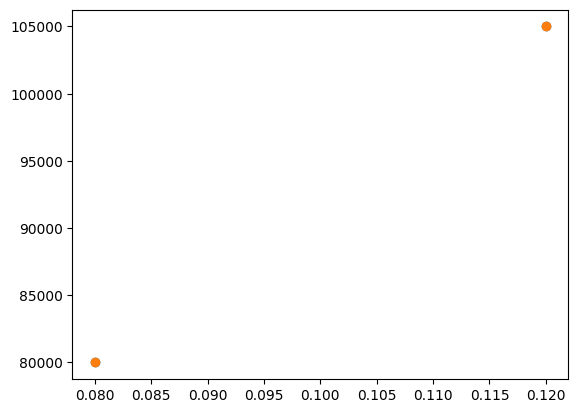

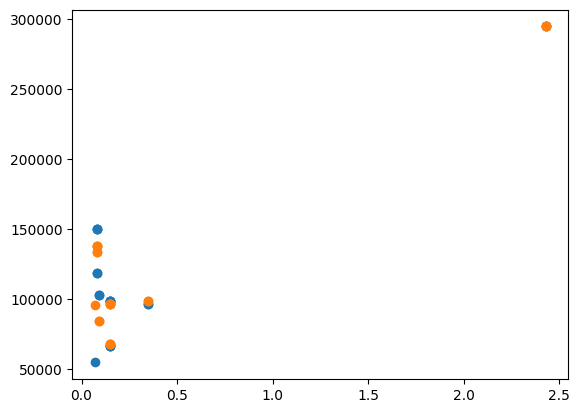

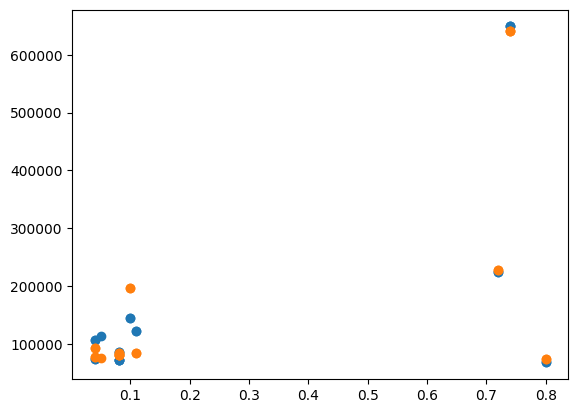

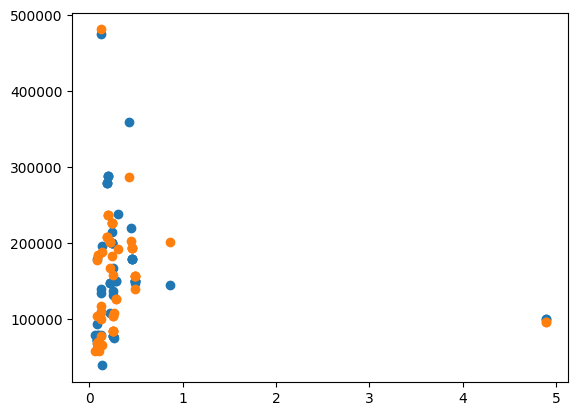

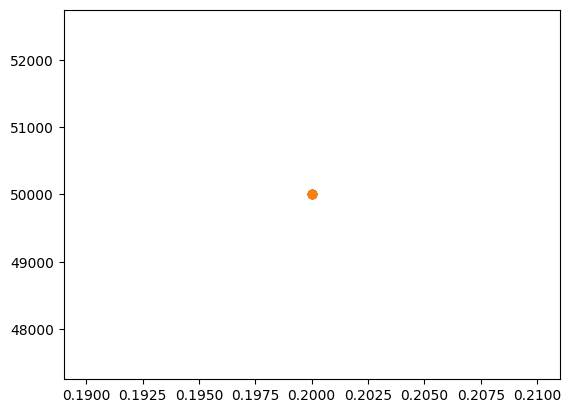

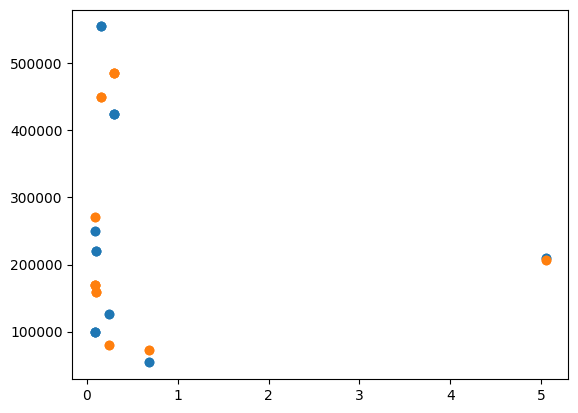

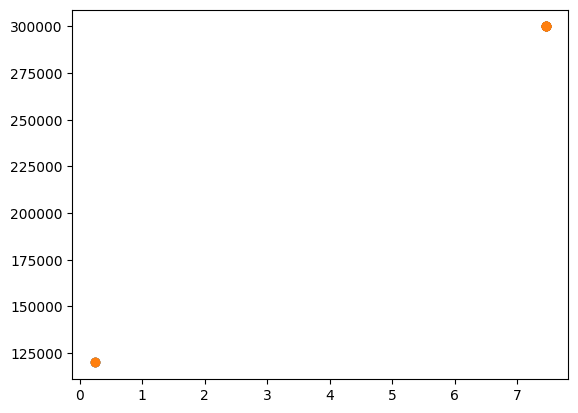

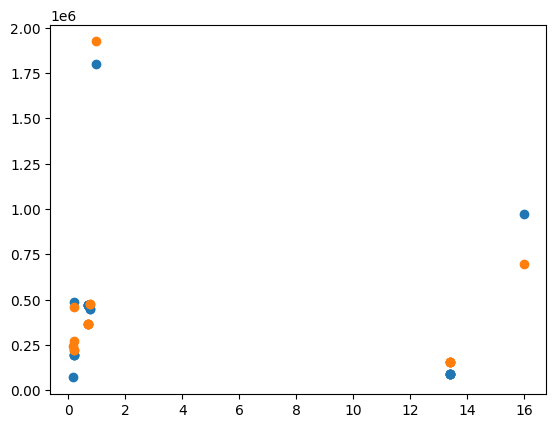

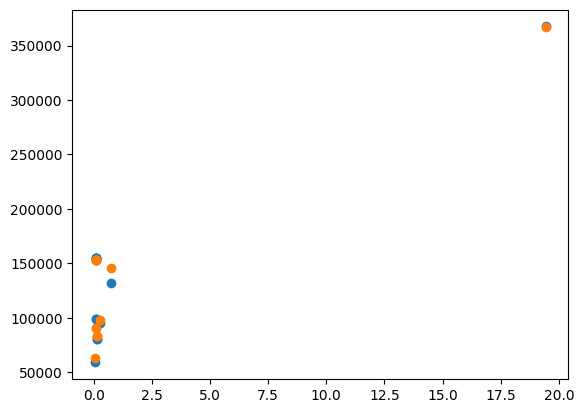

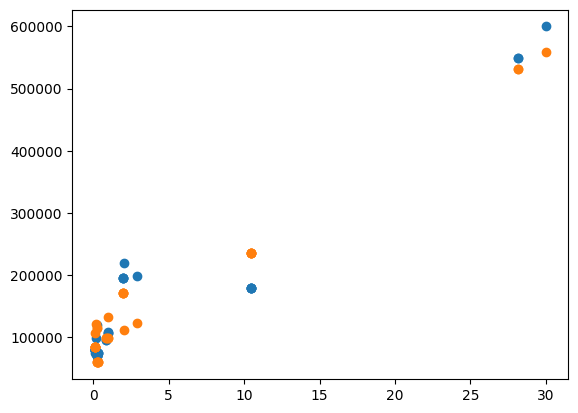

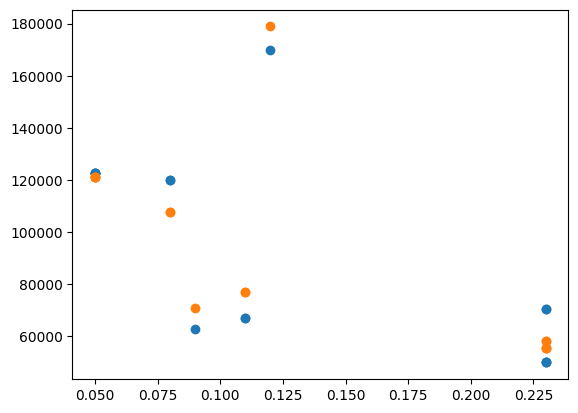

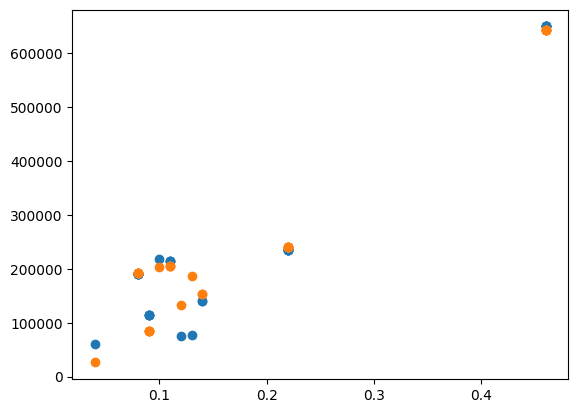

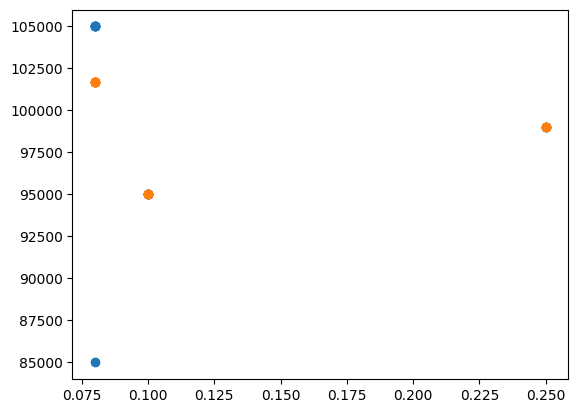

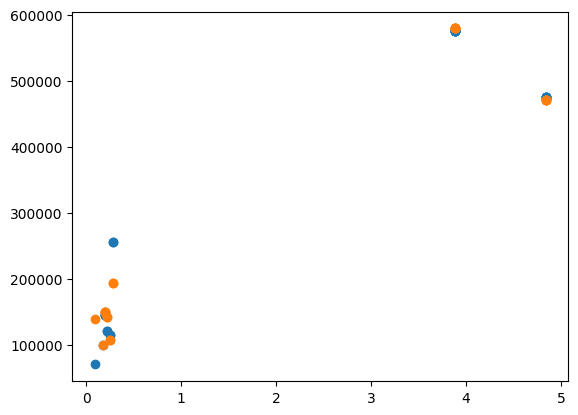

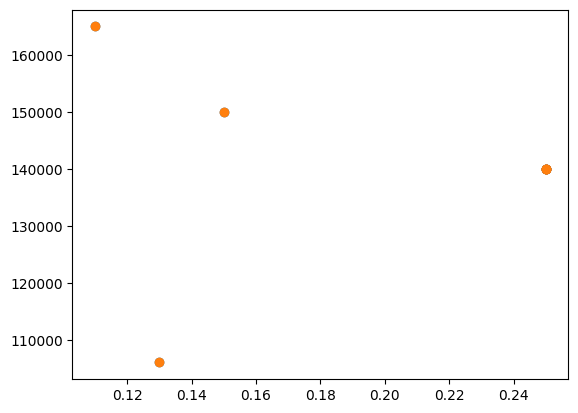

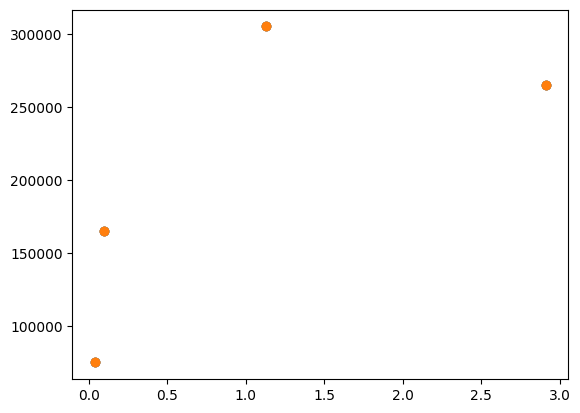

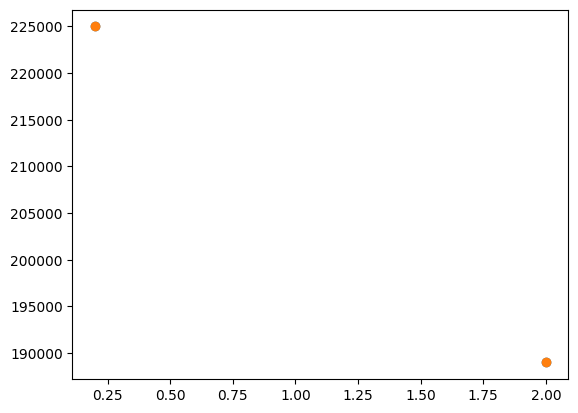

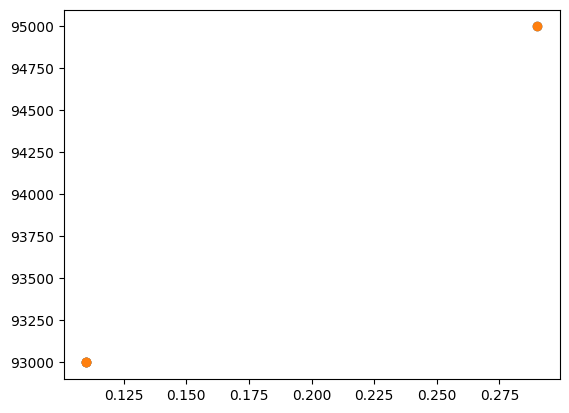

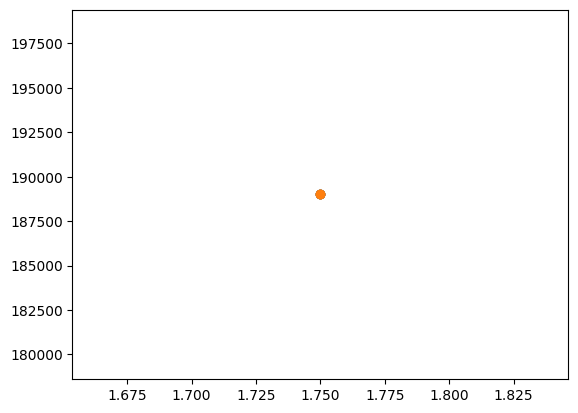

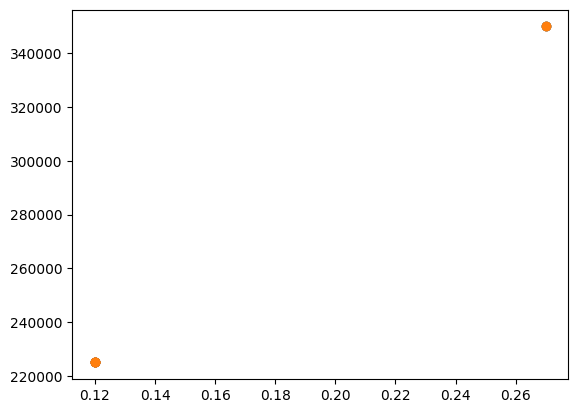

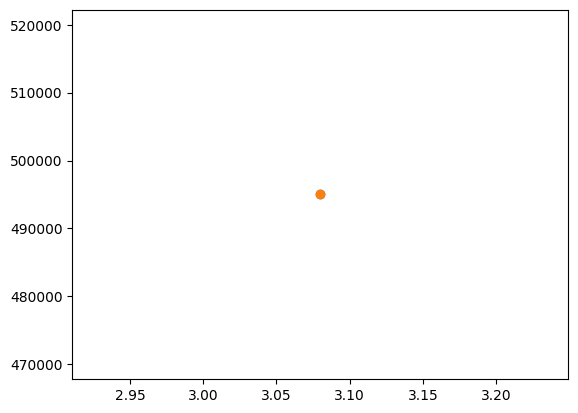

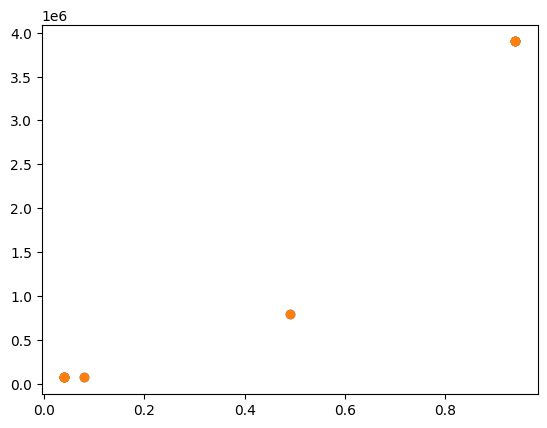

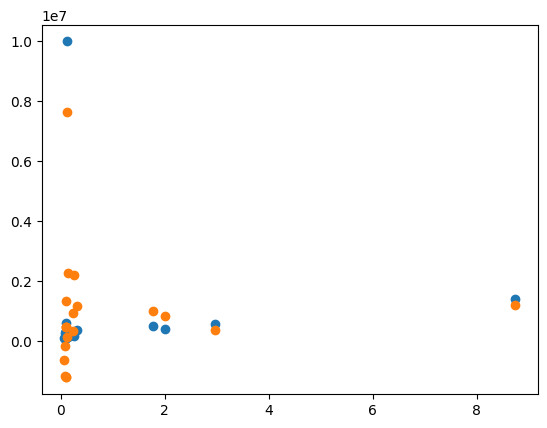

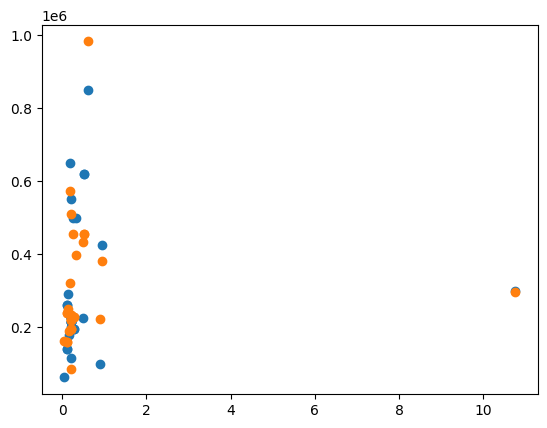

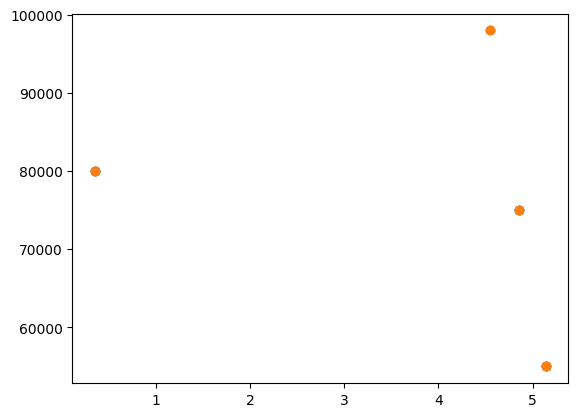

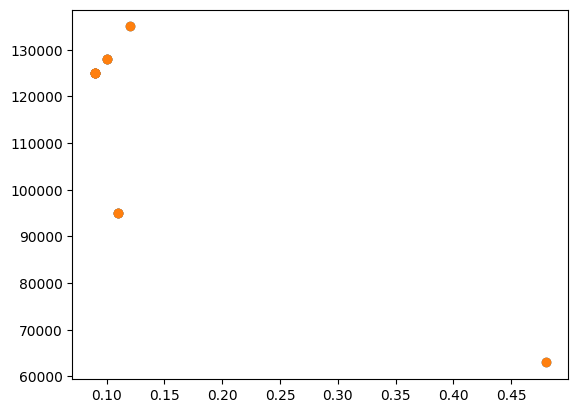

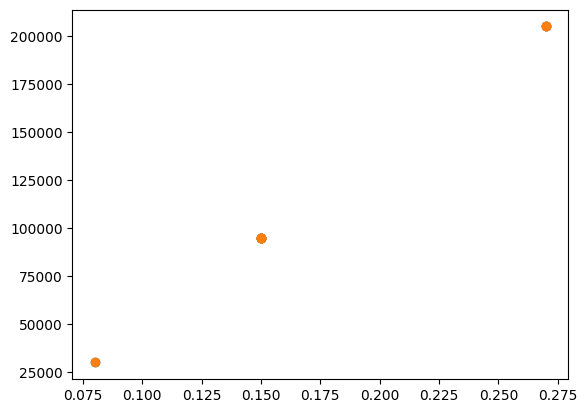

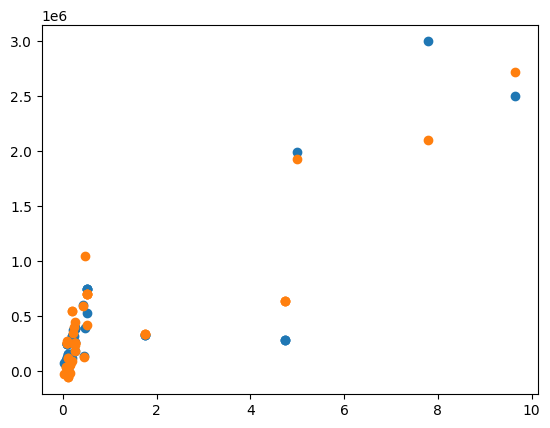

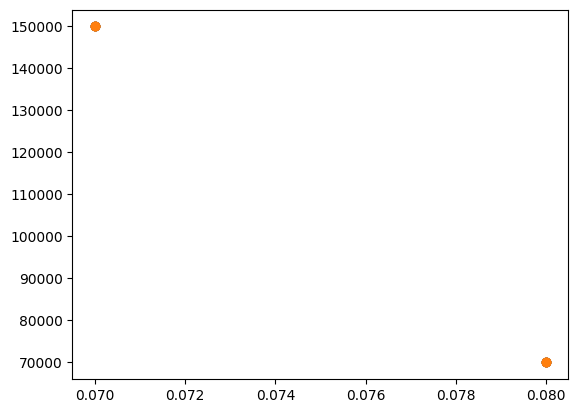

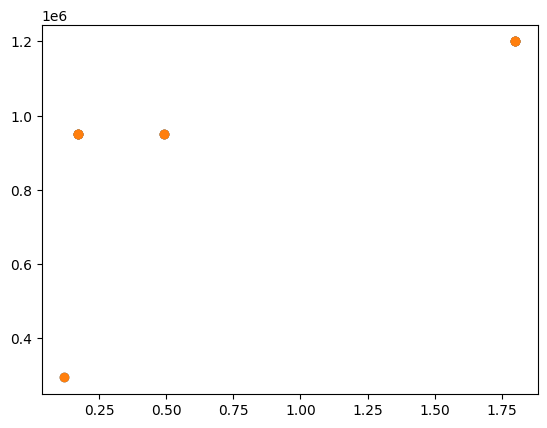

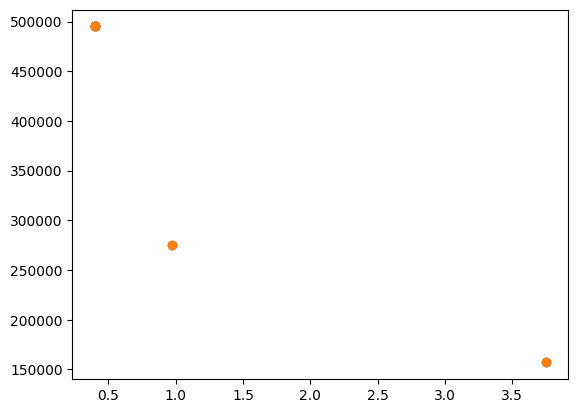

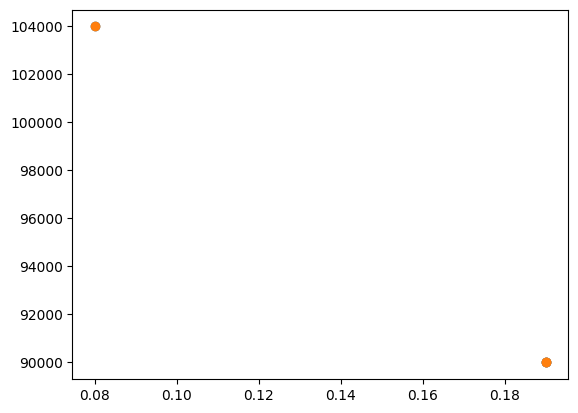

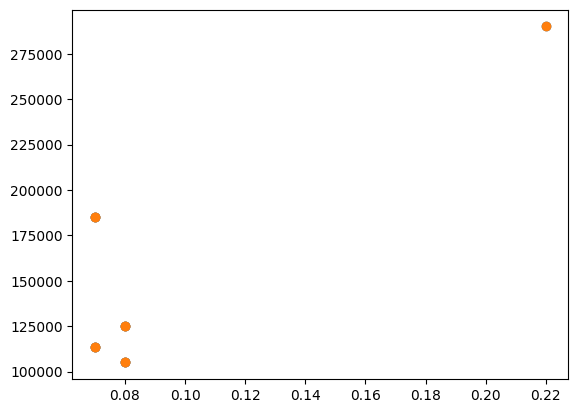

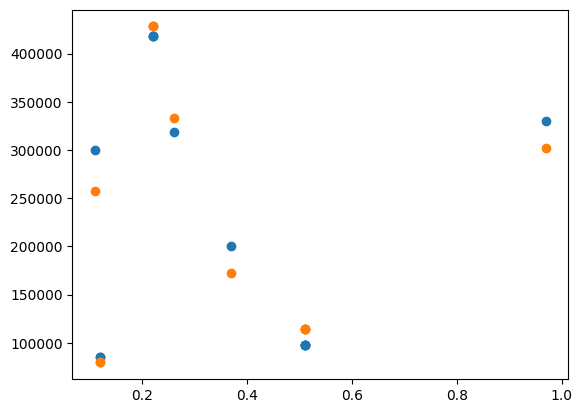

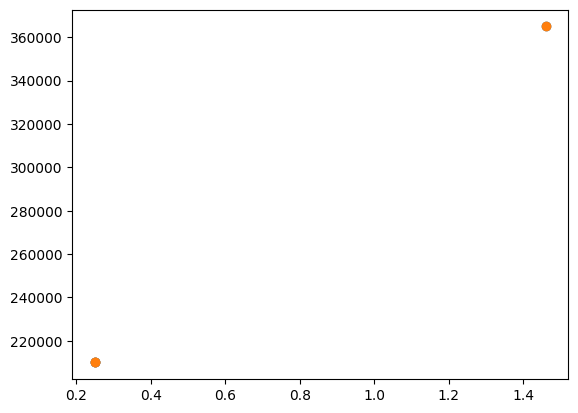

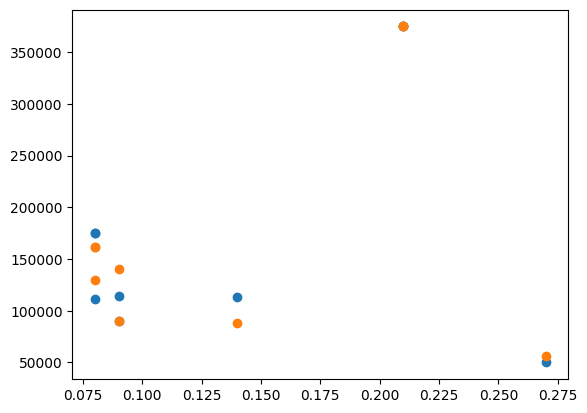

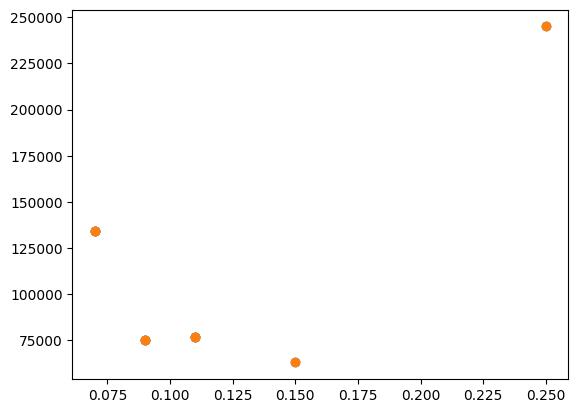

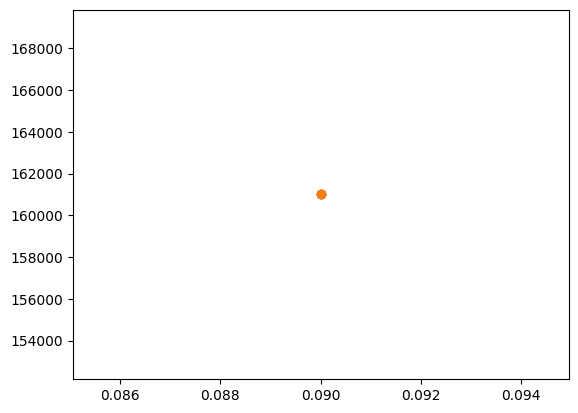

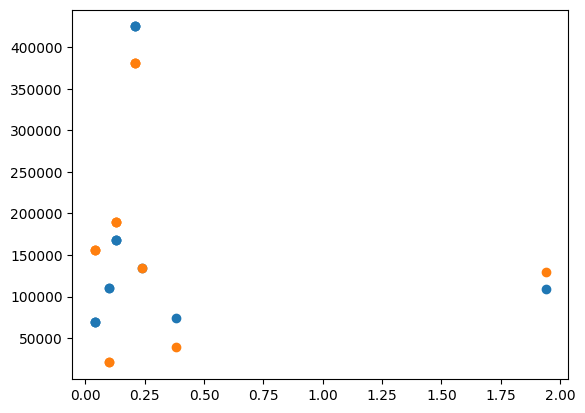

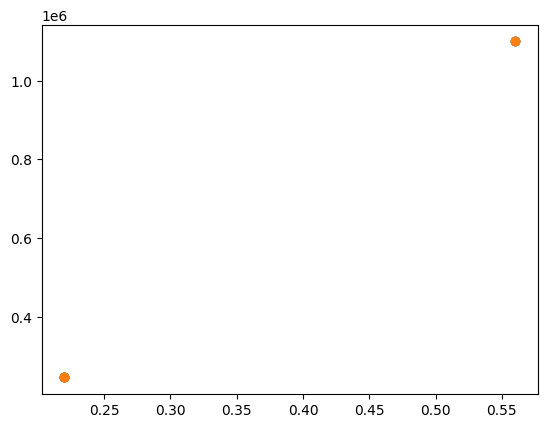

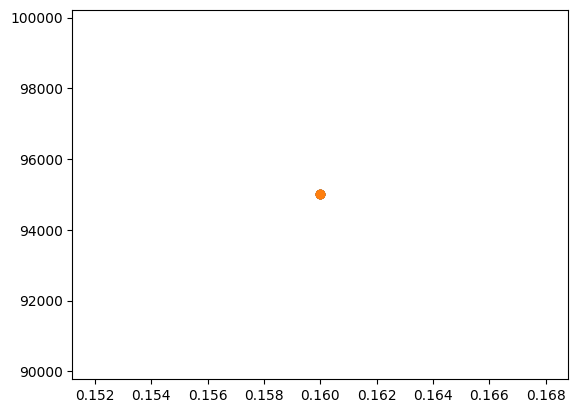

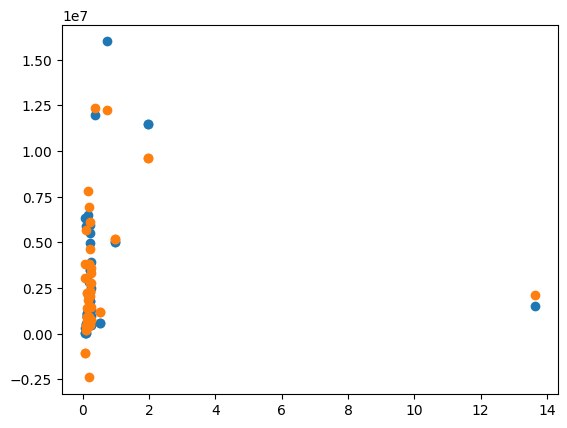

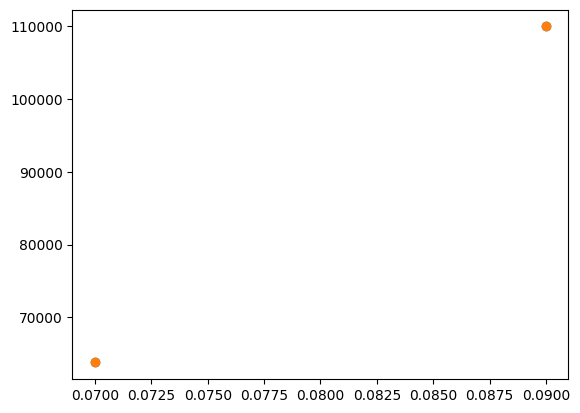

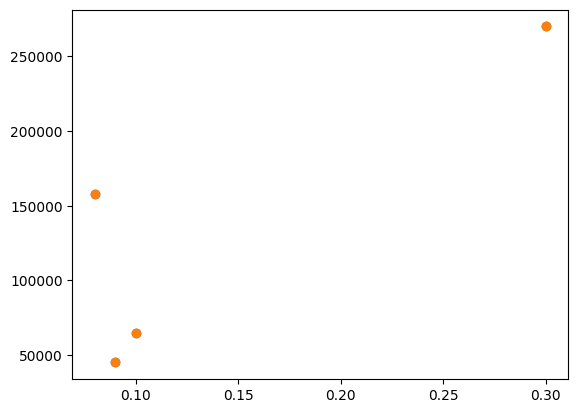

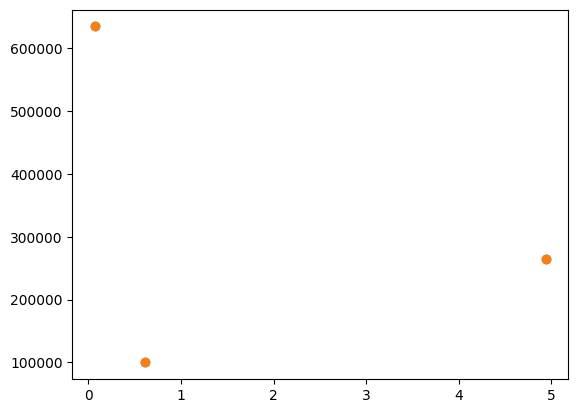

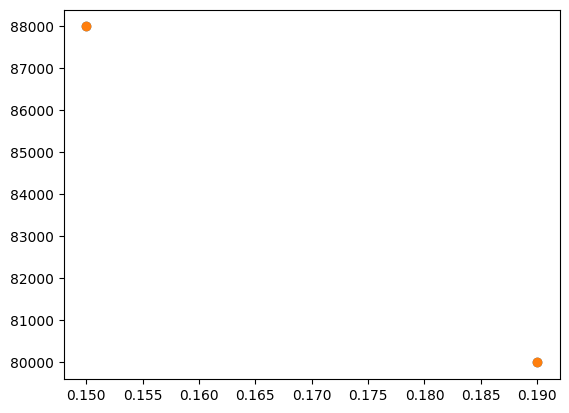

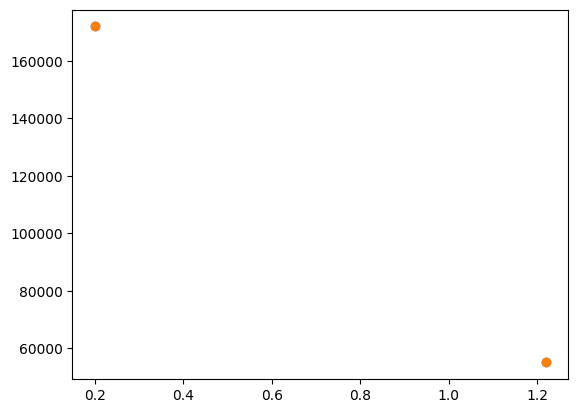

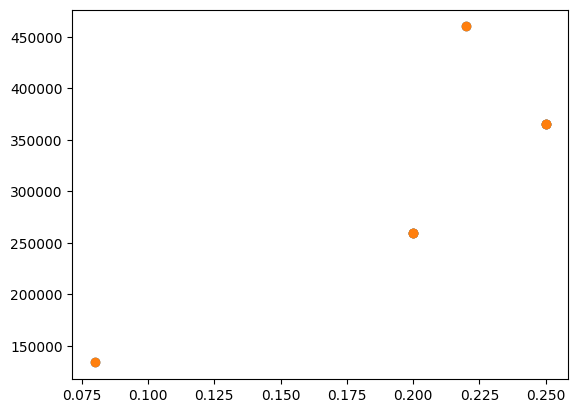

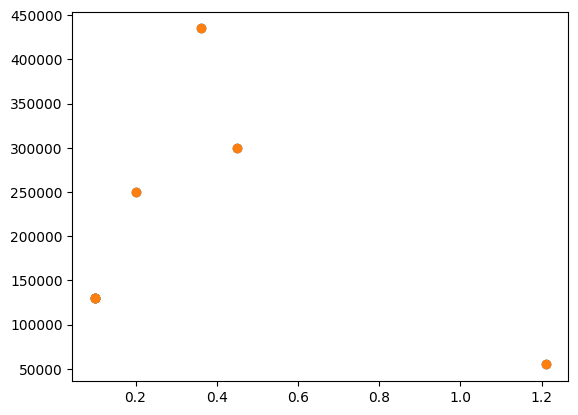

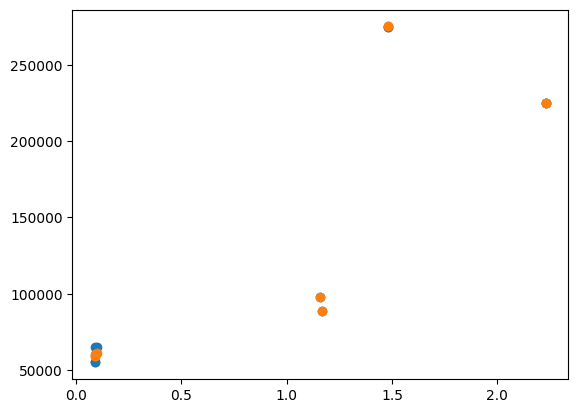

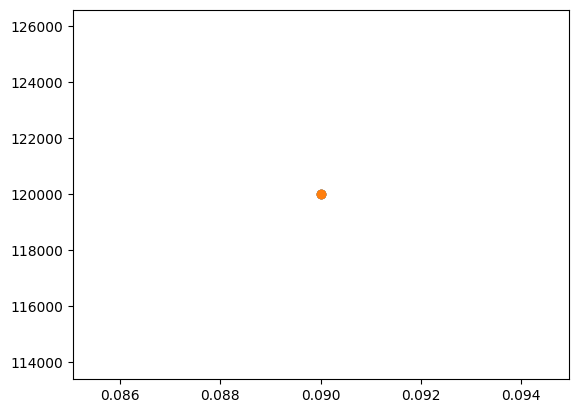

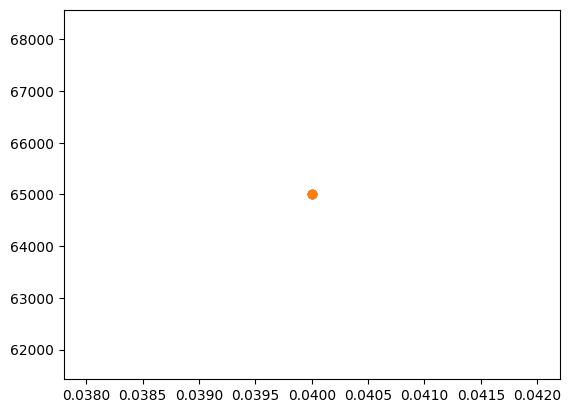

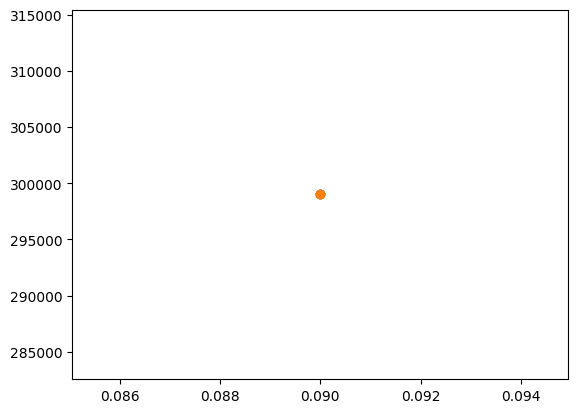

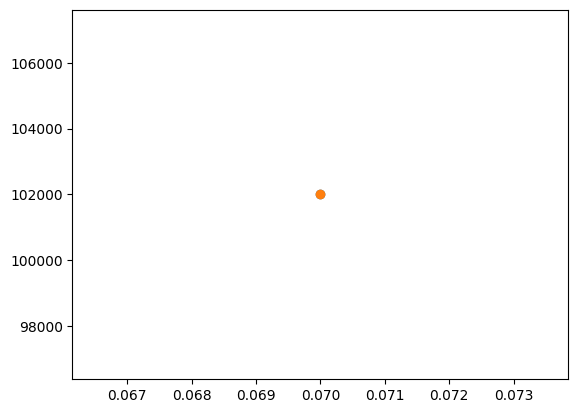

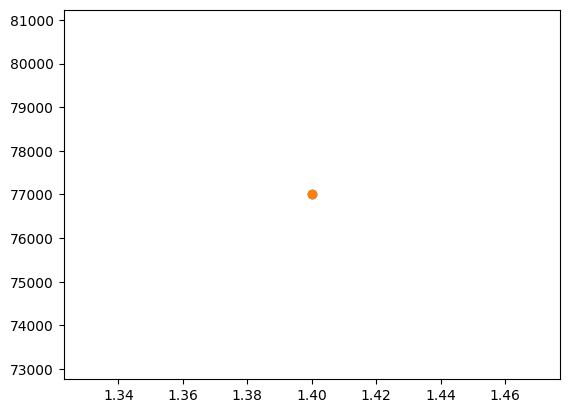

In [116]:
# Set file where data can be found
file = './datasets/realtor-data.csv'
    
# Set dataframe variable
datadf = readData(file)
   
# Create a sample set of the data
sample = datadf.head(1000)

# Create a subset of the sample without NA values
subSample = sample[['bed', 'bath', 'acre_lot', 'house_size', 'zip_code', 'price']].dropna()

# Test the regressor on each zip code in the subset of the sample
for eachCode in subSample['zip_code'].unique():
    runRegressor(subSample, eachCode)